# Data understanding

Het CSV-bestand bestaat uit een viertal kolommen, elk met eigen attributten.
 - `Perdioden` is het jaartal waarin de gemiddelde huisprijs is gemeten.
 - `Regio's` is de regio waar de gegevens van de gemiddelde huisprijs bekent zijn.
 - `Gemiddelde verkoopprijs (euro)` is de hoogte van de gemiddelde huisprijs in een bepaalde regio en bepaalde periode. 

## Beschrijven van de data

Hieronder wordt de data beschreven. Dit wordt telkens door een stukje code gedaan, met comments erbij.

In [2]:
# Importeren van de benodigde packages.
import pandas as pd
import geopandas as gpd


In [3]:
# Importeren van de dataset en in een bestand zetten.
file = "../../../raw-data/Bestaande_koopwoningen__prijzen__regio_16042020_135727.csv"
perceelprijzen = pd.read_csv(file, sep=";")
perceelprijzen

,Perioden,Regio's,Gemiddelde verkoopprijs (euro)
0,1995,Aa en Hunze,NaN
1,1996,Aa en Hunze,NaN
2,1997,Aa en Hunze,NaN
3,1998,Aa en Hunze,130136.0
4,1999,Aa en Hunze,159338.0
...,...,...,...
18070,2015,Zwolle,218349.0
18071,2016,Zwolle,228479.0
18072,2017,Zwolle,245803.0
18073,2018,Zwolle,279684.0


In [4]:
# Beschrijvende statistieken van de data
beschrijvende_perceelprijzen = perceelprijzen.describe()
beschrijvende_perceelprijzen

,Perioden,Gemiddelde verkoopprijs (euro)
count,18075.000000,11672.000000
mean,2007.000000,212495.754626
std,7.211302,82518.105455
min,1995.000000,44163.000000
25%,2001.000000,155195.500000
50%,2007.000000,210286.500000
75%,2013.000000,257239.750000
max,2019.000000,902214.000000


In [5]:
# Beschrijvende statistieken per regio
beschrijvende_periode_perceelprijzen = perceelprijzen.groupby(["Perioden"]).describe()
beschrijvende_periode_perceelprijzen

Gemiddelde verkoopprijs (euro)                               \
                                  count           mean           std   
Perioden                                                               
1995                              635.0  101524.592126  23790.833280   
1996                              625.0  111314.280000  26856.070628   
1997                              572.0  123467.354895  29918.586359   
1998                              552.0  137001.907609  36781.810101   
1999                              539.0  160206.502783  47080.435437   
2000                              537.0  188696.912477  59823.562185   
2001                              504.0  206805.571429  61531.057508   
2002                              499.0  219408.569138  61285.834408   
2003                              491.0  223453.466395  55700.261710   
2004                              483.0  232443.333333  60467.512595   
2005                              467.0  243001.475375  65492.295139   
2006                              459.0  253109.793028  67535.210766   
2007                              443.0  265926.054176  75974.258811   
2008                              443.0  272203.643341  77262.750545   
2009                              441.0  254256.272109  72103.842307   
2010                              431.0  251891.331787  69750.353627   
2011                              418.0  249459.595694  70015.075299   
2012                              415.0  234847.240964  62652.443952   
2013                              408.0  219261.299020  58495.063032   
2014                              403.0  223771.332506  55519.046178   
2015                              394.0  230565.200508  59598.196533   
2016                              390.0  243011.233333  62897.517717   
2017                              388.0  263059.079897  71636.908485   
2018                              380.0  287241.252632  82688.611582   
2019                              355.0  308810.569014  85326.897241   

                                                              
               min        25%       50%        75%       max  
Perioden                                                      
1995       44163.0   87222.50  100965.0  113975.00  231781.0  
1996       48946.0   94814.00  109968.0  125943.00  291452.0  
1997       50981.0  103090.25  122736.5  140204.00  308128.0  
1998       53153.0  114807.00  134866.5  154666.50  353716.0  
1999       72419.0  132984.50  156214.0  181254.00  491949.0  
2000       82992.0  155768.00  182856.0  211459.00  670412.0  
2001       94089.0  170937.00  200200.5  231801.25  607984.0  
2002      113476.0  184451.00  212960.0  248218.00  613507.0  
2003      112657.0  187392.50  219811.0  251128.50  554130.0  
2004      108297.0  194817.50  225414.0  259240.00  631923.0  
2005      123337.0  203032.50  237071.0  272381.50  692900.0  
2006      124293.0  212135.00  245111.0  285012.50  747554.0  
2007      150673.0  220243.50  257449.0  297800.50  803413.0  
2008      142597.0  221938.00  261961.0  306143.00  837221.0  
2009      131199.0  208671.00  244327.0  285910.00  702249.0  
2010      132302.0  208823.50  242486.0  280092.50  788688.0  
2011      132951.0  208794.50  241220.0  276289.50  775402.0  
2012      136112.0  198731.00  228152.0  258366.00  761560.0  
2013      123208.0  184555.25  212921.0  240372.25  609767.0  
2014      119488.0  189468.00  217151.0  248390.50  558336.0  
2015      124837.0  194670.25  223534.5  253184.00  597694.0  
2016      127804.0  206090.75  235380.0  267590.75  649703.0  
2017      140643.0  221290.75  252457.0  290349.50  775770.0  
2018      142173.0  239385.25  275060.0  315509.75  902214.0  
2019      155120.0  257374.00  293693.0  340105.00  831578.0

In [6]:
# Info over de kolommen in perceelprijzen
info_perceel = perceelprijzen.info()
info_perceel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18075 entries, 0 to 18074
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Perioden                        18075 non-null  int64  
 1   Regio's                         18075 non-null  object 
 2   Gemiddelde verkoopprijs (euro)  11672 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 423.8+ KB


In [7]:
# Informatie over de kolomnamen in de Dataframe
perceelprijzen.columns

Index(['Perioden', 'Regio's', 'Gemiddelde verkoopprijs (euro)'], dtype='object')

In [8]:
# Controleren op nulwaarden in de dataframe
perceelprijzen.isna().sum()

Perioden                             0
Regio's                              0
Gemiddelde verkoopprijs (euro)    6403
dtype: int64

## Data Exploratie
In dit gedeelte worden een aantal plotjes getoont over de data. Ook wordt er gekeken naar de kwaliteit van de data.

In [9]:
# Importeren van seaborn voor het plotten van de data
import seaborn as sn

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
sn.pairplot(perceelprijzen, hue="Regio's", height=4)

C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Anaconda\Anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)


ZeroDivisionError: 0.0 cannot be raised to a negative power

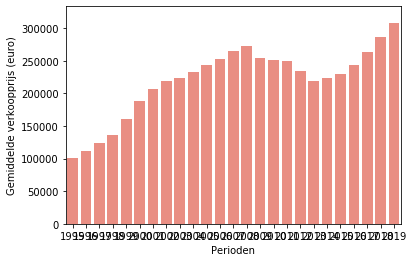

In [11]:
# Catplot weergave van de data.
sn.barplot(x="Perioden", y="Gemiddelde verkoopprijs (euro)", data=perceelprijzen, color="salmon", errwidth=0)